# Generation of Figures and Statistics

In [2]:
import pandas as pd


In [58]:
nccr_df = pd.read_csv('C:/Users/dschw/Documents/GitHub/Thesis/Output/NCCR_combined_corpus_DE_wording_available_prep.csv')

## Figures

### Number of Texts per Country & Party (NCCR_DF)

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [60]:
# Rename partys 
nccr_df["party"].replace({"fpo": "FPÖ",     
                          "ovp": "ÖVP",
                          "teamstronach": "Team Stronach",
                          "neos": "NEOS",
                          "spo": "SPÖ",
                          "bzo": "BZÖ",
                          "lif": "LIF",
                          "sp": "SP",
                          "gps": "GRÜNE Schweiz",  
                          "svp": "SVP",
                          "evp": "EVP",
                          "bdp": "BDP",
                          "cvp": "CVP",
                          "glp": "glp",
                          "edu": "EDU",
                          "afd": "AfD",
                          "cdu": "CDU",
                          "spd": "SPD",
                         "dielinke": "Die Linke",
                         "npd": "NPD",
                         "csu": "CSU"},                       
                         inplace=True)

# Rename parties present in multiple countries
nccr_df.loc[(nccr_df.Sample_Country == 'de') & (nccr_df.party == 'fdp') , 'party'] = "FDP"
nccr_df.loc[(nccr_df.Sample_Country == 'cd') & (nccr_df.party == 'fdp') , 'party'] = "FDP.Die Liberalen"
nccr_df.loc[(nccr_df.Sample_Country == 'de') & (nccr_df.party == 'grune') , 'party'] = "Bündnis 90/Die Grünen"
nccr_df.loc[(nccr_df.Sample_Country == 'au') & (nccr_df.party == 'grune') , 'party'] = "GRÜNE"
nccr_df.loc[(nccr_df.Sample_Country == 'cd') & (nccr_df.party == 'grune') , 'party'] = "GRÜNE Schweiz"

# drop nan
nccr_df.dropna(subset=['party'])

# Rename countries
nccr_df["Sample_Country"].replace({"au": "Austria",   
                         "cd": "Switzerland",
                        "de": "Germany"},                       
                         inplace=True)

nccr_df.sort_values(['Sample_Country', 'party'], inplace=True)
nccr_df.rename(columns={'Sample_Country': 'Country'}, inplace=True)


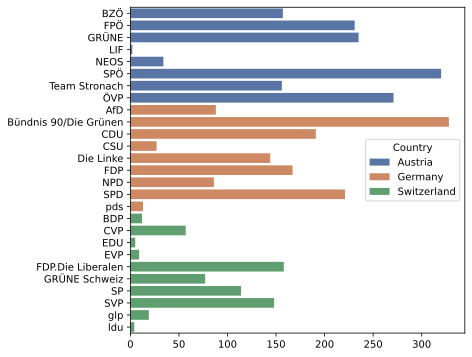

In [61]:
# Number of speeches per country & party
plt.figure(figsize=(6,6))

sns.countplot(y="party", hue='Country', data=nccr_df, dodge=False, palette="deep").set( xlabel='', ylabel='')

plt.savefig('parties_nccr_df.svg')


## Statistics

### Number of tokens

In [65]:
list(nccr_df)

['ID',
 'text',
 'Coder',
 '#TS',
 '#TS2',
 'Codierstart_Lab',
 'Medium',
 'Author',
 'Author_ID',
 'Date',
 'Length',
 'TS_Beginning',
 'TS_End',
 'Images',
 'Position',
 'Genre',
 'Main_Issue',
 'Frame_HI_face',
 'Frame_HI_indi',
 'Frame_HI_emoN',
 'Frame_HI_emoP',
 'Frame_Con_disa',
 'Frame_Con_repr',
 'Frame_Con_winn',
 'Frame_Con_slant',
 'Frame_PRF_conduit',
 'Frame_PRF_context',
 'Frame_PRF_interp',
 'Frame_PRF_account',
 'Frame_Neg_tone',
 'Frame_Neg_scep',
 'Frame_Neg_other',
 'Bemerkungen',
 'Count_Speaker',
 'Count_Issues',
 'Count_ActEval',
 'STYLE_Negativ',
 'STYLE_Emot',
 'T_Brutto',
 'T_Break',
 'T_Netto',
 'T_H',
 'Sessiontext',
 'Session_ID',
 'Sample',
 'Country',
 'Sample_Lang',
 'Sample_Type',
 'Weight',
 'Filter_Coded',
 'STYLE_Colloquial',
 'STYLE_Casual',
 'STYLE_Facts',
 'STYLE_Sense',
 'STYLE_BlackWhite',
 'STYLE_Sarcasm',
 'STYLE_Drama',
 'STYLE_EmoTone',
 'STYLE_CommMan',
 'STYLE_UsThem',
 'STYLE_Privat',
 'STYLE_Coll_pos',
 'STYLE_Coll_neg',
 'STYLE_Emph',
 

In [8]:
#  Get number of tokens in Fulltext and Wording_Segment
import spacy
spacy_model='de_core_news_lg'
nlp_sent = spacy.load(spacy_model, exclude=['tagger', 'morphologizer', 'parser',
                                                         'attribute_ruler', 'lemmatizer'])
nlp_sent.add_pipe("sentencizer")


In [ ]:
# Prepare
nccr_df['doc_text'] = list(nlp_sent.pipe(nccr_df['text_prep']))
nccr_df['doc_segment'] = list(nlp_sent.pipe(nccr_df['wording_segments']))



In [9]:
# Get number of tokens
def get_tokens(x):
    tokens = [token.text for token in x] 
    return len(tokens)


In [68]:
nccr_df['text_tokens'] = nccr_df['doc_text'].apply(lambda x: get_tokens(x))
nccr_df['segment_tokens'] = nccr_df['doc_segment'].apply(lambda x: get_tokens(x))

In [69]:
nccr_df.describe()

,#TS,#TS2,Medium,Author,Author_ID,Length,TS_Beginning,TS_End,Images,Position,...,POP_Unchall,POP_Emph,Spr_ID,year,match_count,Wording_sent_count,Unnamed: 0,ID_non,text_tokens,segment_tokens
count,3.460000e+03,3.460000e+03,3460.000000,3460.000000,3460.000000,3460.000000,0.0,0.0,0.0,3460.000000,...,3460.000000,3460.000000,3460.000000,3460.000000,3460.000000,3460.000000,11.000000,11.000000,3460.000000,3460.000000
mean,1.426605e+09,1.426608e+09,2620.963006,2.000289,13779.756647,561.560983,NaN,NaN,NaN,96.836994,...,0.253468,0.173121,13844.141618,2009.932659,0.548555,1.292775,7.272727,465.818182,569.392486,57.252601
std,1.493423e+07,1.493391e+07,3067.061087,0.056392,2955.997547,1136.166644,NaN,NaN,NaN,14.248223,...,0.435060,0.378407,5409.404129,8.668101,0.836235,0.584175,8.050974,472.297114,1230.679613,27.044465
min,1.404479e+09,1.404481e+09,1150.000000,1.000000,11001.000000,18.000000,NaN,NaN,NaN,1.000000,...,0.000000,0.000000,11001.000000,1972.000000,-1.000000,1.000000,0.000000,30.000000,5.000000,5.000000
25%,1.416653e+09,1.416654e+09,1150.000000,2.000000,11804.000000,214.000000,NaN,NaN,NaN,99.000000,...,0.000000,0.000000,11711.000000,2013.000000,1.000000,1.000000,2.500000,192.000000,186.000000,38.000000
50%,1.427537e+09,1.427539e+09,1360.000000,2.000000,13804.000000,307.000000,NaN,NaN,NaN,99.000000,...,0.000000,0.000000,13804.000000,2013.000000,1.000000,1.000000,5.000000,279.000000,288.000000,55.000000
75%,1.433836e+09,1.433837e+09,1550.000000,2.000000,15803.000000,467.000000,NaN,NaN,NaN,99.000000,...,1.000000,0.000000,15702.000000,2013.000000,1.000000,1.000000,9.000000,586.500000,475.000000,74.000000
max,1.473677e+09,1.473781e+09,9902.000000,5.000000,99999.000000,17195.000000,NaN,NaN,NaN,99.000000,...,1.000000,1.000000,99999.000000,2015.000000,1.000000,3.000000,29.000000,1731.000000,18524.000000,170.000000


In [70]:
len(nccr_df.loc[nccr_df.POPULIST_PeopleCent == 1])
len(nccr_df.loc[nccr_df.POPULIST_AntiElite == 1])
len(nccr_df.loc[nccr_df.POPULIST_Sovereign == 1])

118

In [71]:
# Get number of parties
nccr_df.party.unique()

array(['BZÖ', 'FPÖ', 'GRÜNE', 'LIF', 'NEOS', 'SPÖ', 'Team Stronach',
       'ÖVP', 'AfD', 'Bündnis 90/Die Grünen', 'CDU', 'CSU', 'Die Linke',
       'FDP', 'NPD', 'SPD', 'pds', nan, 'BDP', 'CVP', 'EDU', 'EVP',
       'FDP.Die Liberalen', 'GRÜNE Schweiz', 'SP', 'SVP', 'glp', 'ldu'],
      dtype=object)

### Get Sample Type of examples without party

In [72]:
df = nccr_df[nccr_df['party'].isna()]
len(df)

186

### Number of Texts per Country & Party (BT_DF)

In [3]:
bt_df = pd.read_csv('C:/Users/dschw/Documents/GitHub/Thesis/Output/BT_corpus.csv')

In [4]:
# Drop rows without speaker_id
bt_df.dropna(subset=["spr_id"], inplace=True)

### Variable Overview BT_DF

In [5]:
list(bt_df)

['Unnamed: 0',
 'text_id',
 'text_subid',
 'text_date',
 'text_election_period',
 'text_session_nr',
 'text_location',
 'text_source',
 'spr_id',
 'spr_name',
 'spr_party',
 'spr_location_affix',
 'spr_role_full',
 'spr_role_short',
 'spr_state',
 'spr_text']

In [7]:
bt_df.text_date

0        24.10.2017
1        24.10.2017
3        24.10.2017
5        24.10.2017
7        24.10.2017
            ...    
63680    25.06.2021
63682    25.06.2021
63684    25.06.2021
63686    25.06.2021
63688    25.06.2021
Name: text_date, Length: 34180, dtype: object

In [10]:
# Prepare
bt_df['doc_text'] = list(nlp_sent.pipe(bt_df['spr_text']))

KeyboardInterrupt: 

In [ ]:
# Get number of tokens
bt_df['text_tokens'] = bt_df['doc_text'].apply(lambda x: get_tokens(x))


In [ ]:
bt_df.describe()